In [4]:
import pandas as pd
import jpholiday

def data_loader():
    train = pd.read_csv("JR/train.csv")
    test = pd.read_csv("JR/test.csv")
    info= pd.read_csv("JR/info.csv")

    network = pd.read_csv("JR/network.csv")
    return train, test, info, network
train, test, info, network = data_loader()


In [3]:
train.head()

,id,date,lineName,directionCode,trainNo,stopStation,planArrival,delayTime
0,0,20191204,A,1,AFGKvJ,Rlfq,06:11,0.0
1,1,20191204,A,1,AFGKvJ,coZB,06:13,0.0
2,2,20191204,A,1,AFGKvJ,LMww,06:16,0.0
3,3,20191204,A,1,AFGKvJ,VNyR,06:18,0.0
4,4,20191204,A,1,AFGKvJ,jhlV,06:20,0.0


In [4]:
train[train.date  == 20191204]

,id,date,lineName,directionCode,trainNo,stopStation,planArrival,delayTime
0,0,20191204,A,1,AFGKvJ,Rlfq,06:11,0.0
1,1,20191204,A,1,AFGKvJ,coZB,06:13,0.0
2,2,20191204,A,1,AFGKvJ,LMww,06:16,0.0
3,3,20191204,A,1,AFGKvJ,VNyR,06:18,0.0
4,4,20191204,A,1,AFGKvJ,jhlV,06:20,0.0
...,...,...,...,...,...,...,...,...
31751,31751,20191204,D,2,zbKwea,BCRD,18:15,6.0
31752,31752,20191204,D,2,zbKwea,AVjc,18:20,5.0
31753,31753,20191204,D,2,zbKwea,uYlv,18:23,6.0
31754,31754,20191204,D,2,zbKwea,wwYD,18:28,5.0


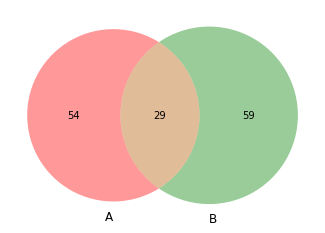

In [6]:
from matplotlib_venn import venn2
venn2([set(train.date.unique()), set(test.date.unique())])

In [7]:
common_date = train[train.date.isin(test.date.unique())].date.unique()

In [8]:
train[train.date == 20191211].head()

,id,date,lineName,directionCode,trainNo,stopStation,planArrival,delayTime
95089,95089,20191211,A,1,AcTTON,Rlfq,18:22,0.0
95090,95090,20191211,A,1,AcTTON,coZB,18:24,0.0
95091,95091,20191211,A,1,AcTTON,LMww,18:27,0.0
95092,95092,20191211,A,1,AcTTON,VNyR,18:29,0.0
95093,95093,20191211,A,1,AcTTON,jhlV,18:31,0.0


In [5]:

def time_feature(df, info):

    #make daytime
    df["date_and_time"] = df.date.astype(str) + ":"+df.planArrival.astype(str)
    df["date_and_time"] = pd.to_datetime(df["date_and_time"], format='%Y%m%d:%H:%M')
    
    
    info["date_and_time"] = info.date.astype(str) + ":"+info.time.astype(str)
    info["date_and_time"] = pd.to_datetime(info["date_and_time"], format='%Y%m%d:%H:%M')
    
    df["hour"] = df.date_and_time.dt.hour
    info["hour"] = info.date_and_time.dt.hour
    
    df["day"] = df.date_and_time.dt.dayofweek

    df["am_pm"] = 0
    df["am_pm"][df.hour > 12] = 1
    info["am_pm"] = 0
    info["am_pm"][info.hour > 12] = 1
    
    #df["is_holiday"] = jpholiday.is_holiday(df.date_and_time.dt)*1
    dates = df.date_and_time.unique()
    date_dict = {}
    for i in dates:
        date_dict[i] = jpholiday.is_holiday(pd.to_datetime(i, format='%Y%m%d:%H:%M'))
    df["is_holiday"] = df.date_and_time.map(date_dict)
    return df, info
test, _ = time_feature(test, info)

<ipython-input-5-a6bae3ba3410>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["am_pm"][df.hour > 12] = 1
<ipython-input-5-a6bae3ba3410>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info["am_pm"][info.hour > 12] = 1


In [25]:
minnum = []
maxnum = []
import numpy as np
for i in test.date.unique():
    
    am_min_date = test[(test.date == i) & (test.target == 1) & (test.am_pm == 0)].planArrival
    am_max_date = test[(test.date == i) & (test.target == 1) & (test.am_pm == 0)].planArrival
    pm_min_date = test[(test.date == i) & (test.target == 1) & (test.am_pm == 1)].planArrival
    pm_max_date = test[(test.date == i) & (test.target == 1) & (test.am_pm == 1)].planArrival
    if len(am_min_date) != 0:
        #print(i, am_min_date.min(), am_max_date.max())
        minnum.append(am_min_date.min())
        maxnum.append(am_max_date.max())
    if len(pm_min_date) != 0:
        #print(i, pm_min_date.min(), pm_max_date.max())
        minnum.append(pm_min_date.min())
        maxnum.append(pm_max_date.max())

In [28]:
pd.Series(minnum).value_counts()

08:01    42
18:01    26
19:01    23
09:01     7
dtype: int64

In [29]:
pd.Series(maxnum).value_counts()

08:59    42
18:59    26
19:59    23
09:58     7
dtype: int64

In [16]:
k = 3000
test[test.date == 20191201].sort_values("planArrival")[k:k+30]

,id,date,lineName,directionCode,trainNo,stopStation,planArrival,delayTime,target
10673,1499558,20191201,C,2,rQTsVn,yuIQ,17:53,8.0,0
6971,1495856,20191201,B,2,wtMmSa,xKSN,17:53,0.0,0
2372,1491257,20191201,A,2,dkUWuu,APgF,17:53,1.0,0
8933,1497818,20191201,C,2,ACHbwz,ZcpD,17:53,8.0,0
12224,1501109,20191201,D,2,igUQld,uYlv,17:53,0.0,0
4844,1493729,20191201,B,1,tlQXBW,ReJL,17:53,0.0,0
2119,1491004,20191201,A,2,VMMCnl,tPfo,17:53,3.0,0
11962,1500847,20191201,D,2,SrYvTo,Rlfq,17:53,0.0,0
10019,1498904,20191201,C,2,aVSFVV,RDLf,17:53,1.0,0
4600,1493485,20191201,B,1,mwHQFT,CbCQ,17:53,0.0,0


In [21]:
train["n_group"] = train.groupby(["date","lineName","directionCode"]).ngroup()

In [27]:
train[train["n_group"] == 0].tail(50)

,id,date,lineName,directionCode,trainNo,stopStation,planArrival,delayTime,n_group
3949,3949,20191204,A,1,zAEast,tncu,17:47,0.0,0
3950,3950,20191204,A,1,zBdwQA,Rlfq,17:51,0.0,0
3951,3951,20191204,A,1,zBdwQA,coZB,17:54,0.0,0
3952,3952,20191204,A,1,zBdwQA,LMww,17:56,0.0,0
3953,3953,20191204,A,1,zBdwQA,VNyR,17:59,0.0,0
3954,3954,20191204,A,1,zBdwQA,jhlV,18:01,0.0,0
3955,3955,20191204,A,1,zHUwgs,aCxM,08:36,0.0,0
3956,3956,20191204,A,1,zHUwgs,AFTQ,08:38,0.0,0
3957,3957,20191204,A,1,zcBaSK,mxQg,06:15,0.0,0
3958,3958,20191204,A,1,zcBaSK,PsTo,06:18,0.0,0


In [25]:
train.n_group.value_counts()

650    5216
450    5204
442    5180
2      5097
346    5090
       ... 
542     847
470     847
550     832
159     788
551     715
Name: n_group, Length: 664, dtype: int64

In [30]:
train.hour

AttributeError: 'DataFrame' object has no attribute 'hour'